In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import GridSearchCV


In [5]:
df = pd.read_csv("train_LR_prep.csv")
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month_2,pickup_month_3,...,pickup_dayofweek_4,pickup_dayofweek_5,pickup_dayofweek_6,pickup_slot_Evening,pickup_slot_Late_Night,pickup_slot_Midnight,pickup_slot_Morning,pickup_slot_Night,pickup_slot_Noon,distance
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,1,...,0,0,0,1,0,0,0,0,0,1.498521
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,0,...,0,0,1,0,1,0,0,0,0,1.805507
2,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0,0,...,0,0,0,0,0,0,0,1,0,1.485498
3,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0,1,...,0,1,0,0,0,0,0,0,1,1.188588
4,1,6,-73.982857,40.742195,-73.992081,40.749184,0,443,0,0,...,0,1,0,0,0,1,0,0,0,1.098942


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066333 entries, 0 to 1066332
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   vendor_id               1066333 non-null  int64  
 1   passenger_count         1066333 non-null  int64  
 2   pickup_longitude        1066333 non-null  float64
 3   pickup_latitude         1066333 non-null  float64
 4   dropoff_longitude       1066333 non-null  float64
 5   dropoff_latitude        1066333 non-null  float64
 6   store_and_fwd_flag      1066333 non-null  int64  
 7   trip_duration           1066333 non-null  int64  
 8   pickup_month_2          1066333 non-null  int64  
 9   pickup_month_3          1066333 non-null  int64  
 10  pickup_month_4          1066333 non-null  int64  
 11  pickup_month_5          1066333 non-null  int64  
 12  pickup_month_6          1066333 non-null  int64  
 13  pickup_dayofweek_1      1066333 non-null  int64  
 14  pi

In [7]:
df.index

RangeIndex(start=0, stop=1066333, step=1)

In [8]:
df.memory_usage()

Index                         128
vendor_id                 8530664
passenger_count           8530664
pickup_longitude          8530664
pickup_latitude           8530664
dropoff_longitude         8530664
dropoff_latitude          8530664
store_and_fwd_flag        8530664
trip_duration             8530664
pickup_month_2            8530664
pickup_month_3            8530664
pickup_month_4            8530664
pickup_month_5            8530664
pickup_month_6            8530664
pickup_dayofweek_1        8530664
pickup_dayofweek_2        8530664
pickup_dayofweek_3        8530664
pickup_dayofweek_4        8530664
pickup_dayofweek_5        8530664
pickup_dayofweek_6        8530664
pickup_slot_Evening       8530664
pickup_slot_Late_Night    8530664
pickup_slot_Midnight      8530664
pickup_slot_Morning       8530664
pickup_slot_Night         8530664
pickup_slot_Noon          8530664
distance                  8530664
dtype: int64

In [9]:
df.memory_usage().sum()/1024**2

211.52247619628906

In [10]:
int_vars = df.columns[~df.columns.isin(['trip_duration', 'distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])]

In [11]:
int_vars

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_month_2',
       'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6',
       'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3',
       'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6',
       'pickup_slot_Evening', 'pickup_slot_Late_Night', 'pickup_slot_Midnight',
       'pickup_slot_Morning', 'pickup_slot_Night', 'pickup_slot_Noon'],
      dtype='object')

In [12]:
df[int_vars] = df[int_vars].astype('uint16')

In [13]:
df.memory_usage().sum()/1024**2

89.49034881591797

In [14]:
df.isnull().sum()

vendor_id                 0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_month_2            0
pickup_month_3            0
pickup_month_4            0
pickup_month_5            0
pickup_month_6            0
pickup_dayofweek_1        0
pickup_dayofweek_2        0
pickup_dayofweek_3        0
pickup_dayofweek_4        0
pickup_dayofweek_5        0
pickup_dayofweek_6        0
pickup_slot_Evening       0
pickup_slot_Late_Night    0
pickup_slot_Midnight      0
pickup_slot_Morning       0
pickup_slot_Night         0
pickup_slot_Noon          0
distance                  0
dtype: int64

In [15]:
X = df.loc[:, ~df.columns.isin(['trip_duration'])]

In [16]:
y = df['trip_duration']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=100)


In [18]:
X_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month_2,pickup_month_3,pickup_month_4,...,pickup_dayofweek_4,pickup_dayofweek_5,pickup_dayofweek_6,pickup_slot_Evening,pickup_slot_Late_Night,pickup_slot_Midnight,pickup_slot_Morning,pickup_slot_Night,pickup_slot_Noon,distance
319694,0,1,-74.002655,40.739632,-74.007774,40.737583,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.487765
236635,0,3,-73.945511,40.774403,-73.955055,40.785091,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.434730
1035890,1,2,-73.968094,40.762474,-73.974907,40.752083,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.290107
587946,1,1,-74.002419,40.739601,-73.997139,40.742199,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.530363
525599,0,1,-74.003899,40.713314,-73.974594,40.750729,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.837884


In [48]:
y_train.head()

319694     565
236635     644
1035890    404
587946     213
525599     597
Name: trip_duration, dtype: int64

In [19]:
dt_default = DecisionTreeClassifier(max_depth=2)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
y_pred_default = dt_default.predict(X_test)

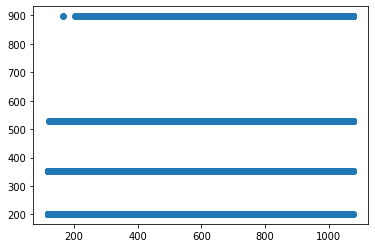

In [21]:
plt.scatter(y_test, y_pred_default)
plt.show()

In [22]:
dt_default.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])

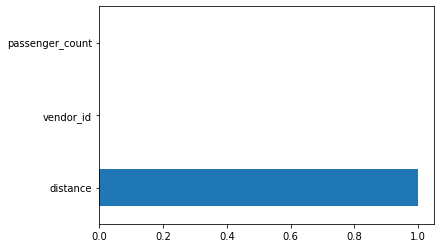

In [23]:
feat_importances = pd.Series(dt_default.feature_importances_, index=X_train.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [24]:
dt_default.score(X_train, y_train)

0.002601205533921174

In [25]:
dt_default.score(X_test, y_test)

0.0022694556588689296

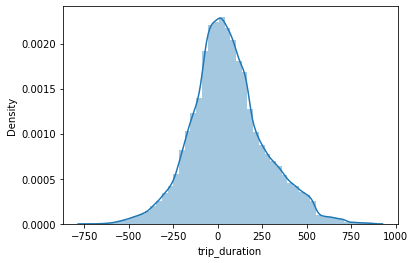

In [26]:
sns.distplot(y_test - y_pred_default)
plt.show()

In [27]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5],
           "min_samples_leaf":[5,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
           }

In [28]:
tuning_model = GridSearchCV(dt_default,
                            param_grid=parameters,
                            scoring='neg_mean_squared_log_error',
                            cv=3,
                            verbose=3)


In [29]:
tuning_model.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=1, min_samples_leaf=5, splitter=best;, score=-0.195 total time=   3.9s
[CV 2/3] END max_depth=1, min_samples_leaf=5, splitter=best;, score=-0.195 total time=   3.5s
[CV 3/3] END max_depth=1, min_samples_leaf=5, splitter=best;, score=-0.223 total time=   3.3s
[CV 1/3] END max_depth=1, min_samples_leaf=5, splitter=random;, score=-0.298 total time=   1.8s
[CV 2/3] END max_depth=1, min_samples_leaf=5, splitter=random;, score=-0.401 total time=   2.0s
[CV 3/3] END max_depth=1, min_samples_leaf=5, splitter=random;, score=-0.345 total time=   1.9s
[CV 1/3] END max_depth=1, min_samples_leaf=10, splitter=best;, score=-0.195 total time=   3.4s
[CV 2/3] END max_depth=1, min_samples_leaf=10, splitter=best;, score=-0.195 total time=   3.4s
[CV 3/3] END max_depth=1, min_samples_leaf=10, splitter=best;, score=-0.223 total time=   3.2s
[CV 1/3] END max_depth=1, min_samples_leaf=10, splitter=random;, score=-0.298 total 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 3, 5], 'min_samples_leaf': [5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_log_error', verbose=3)

In [30]:
# cv results
cv_results = pd.DataFrame(tuning_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.352356,0.140315,1.302356,0.154556,1,5,best,"{'max_depth': 1, 'min_samples_leaf': 5, 'split...",-0.195294,-0.194703,-0.223426,-0.204474,0.013403,5
1,0.585689,0.055778,1.366274,0.108676,1,5,random,"{'max_depth': 1, 'min_samples_leaf': 5, 'split...",-0.298168,-0.401174,-0.345403,-0.348248,0.042100,11
2,2.233413,0.061046,1.192770,0.050305,1,10,best,"{'max_depth': 1, 'min_samples_leaf': 10, 'spli...",-0.195294,-0.194703,-0.223426,-0.204474,0.013403,5
3,0.539263,0.027922,1.252500,0.058664,1,10,random,"{'max_depth': 1, 'min_samples_leaf': 10, 'spli...",-0.298168,-0.401174,-0.360931,-0.353424,0.042386,12
4,6.432180,0.010672,1.215387,0.059511,3,5,best,"{'max_depth': 3, 'min_samples_leaf': 5, 'split...",-0.175565,-0.189723,-0.170971,-0.178753,0.007980,3
5,0.992005,0.025315,1.200546,0.087189,3,5,random,"{'max_depth': 3, 'min_samples_leaf': 5, 'split...",-0.300017,-0.384376,-0.275618,-0.320004,0.046595,8
6,6.441775,0.033788,1.203770,0.039023,3,10,best,"{'max_depth': 3, 'min_samples_leaf': 10, 'spli...",-0.175565,-0.189723,-0.170971,-0.178753,0.007980,3
7,0.959079,0.028352,1.174515,0.023084,3,10,random,"{'max_depth': 3, 'min_samples_leaf': 10, 'spli...",-0.355245,-0.413576,-0.273143,-0.347322,0.057605,10
8,12.024192,0.017170,1.210753,0.034011,5,5,best,"{'max_depth': 5, 'min_samples_leaf': 5, 'split...",-0.169004,-0.172520,-0.173072,-0.171532,0.001801,1
9,1.425175,0.021162,1.172563,0.034359,5,5,random,"{'max_depth': 5, 'min_samples_leaf': 5, 'split...",-0.178512,-0.306827,-0.342578,-0.275972,0.070444,7


In [31]:
tuning_model.best_params_


{'max_depth': 5, 'min_samples_leaf': 5, 'splitter': 'best'}

In [32]:
tuning_model.best_score_


-0.17153215144281966

In [33]:
tuning_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [34]:
dt_final = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=5,
                              random_state=100)

dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [35]:
dt_final.score(X_test, y_test)

0.002461702935756587

In [36]:
y_pred_final = dt_final.predict(X_test)

In [49]:
pd.DataFrame(y_pred_final)

,0
0,404
1,529
2,298
3,529
4,260
...,...
213262,901
213263,529
213264,260
213265,404


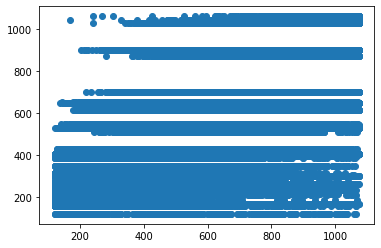

In [37]:
plt.scatter(y_test, y_pred_final)
plt.show()

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_final))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_final))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))
print('RMSLE', metrics.mean_squared_log_error(y_test, y_pred_final))

MAE: 155.47509928868507
MSE: 42370.41670769505
RMSE: 205.84075570133103
RMSLE 0.1760823987797519


In [39]:
test = pd.read_csv('test_EDA.csv')

In [40]:
sub_df = pd.DataFrame()
sub_df['id'] = test['id']
sub_df.head()

,id
0,id3004672
1,id3505355
2,id1217141
3,id2150126
4,id1598245


In [41]:
test[int_vars] = test[int_vars].astype('uint16')

In [42]:
X_test_final = test.drop('id', axis=1)

In [43]:
y_pred = dt_final.predict(X_test_final)

In [50]:
pd.DataFrame(y_pred).head()

,0
0,649
1,649
2,404
3,1029
4,298


In [51]:
sub_df = pd.concat([sub_df, pd.DataFrame(y_pred)], axis=1)

In [52]:
sub_df.head()

,id,0
0,id3004672,649
1,id3505355,649
2,id1217141,404
3,id2150126,1029
4,id1598245,298


In [53]:
sub_df = sub_df.rename(columns={0:'trip_duration'})
sub_df.head()

,id,trip_duration
0,id3004672,649
1,id3505355,649
2,id1217141,404
3,id2150126,1029
4,id1598245,298


In [54]:
sub_df.to_csv('NYC_DecisionTree.csv', index=False)